In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('KPI_General_SFTW.xlsx')

In [3]:
df

,Family product,Process,TaskLb,Task,Impact,start,end,completion
0,General,Software,Repo,Software developments inventory and documentat...,Traceability,2021-06-24,2021-10-04,0.35
1,Brackets,Top Assembly,Hw issues,Test development for weight testing - Hardwar...,QA,2021-05-05,2021-10-04,0.95
2,General,Top Assembly,Leg Plat,New development for packing label in SSL - Leg...,Service,2021-06-08,2021-10-04,0.95
3,General,Top Assembly,Hr X Hr,KPI production/QA report (Former hour by hour ...,Service,2021-05-05,2021-10-04,0.30
4,Obstruction,Top Assembly,Obs Scan,Test/register system for obstruction items (tr...,Service,2021-08-16,2021-09-13,1.00
5,Solid State,Top Assembly,Fld Lab,Box Labeling process for New ProSite Floodlight,Service,2021-05-23,2021-07-23,1.00
6,Obstruction,Top Assembly,INEMAuto,Automated Flash INEM implementation,Service,2021-09-10,2021-09-25,1.00
7,General,Top Assembly,BarTender,Design for new packing label SSL based on BarT...,Service,2021-09-23,2021-10-04,0.17
8,Obstruction,Top Assembly,GatewayAuto,Automated Flash Gateway implementation,Service,2021-10-05,2021-10-07,1.00


In [4]:
#Project Start Date
proj_start = df.start.min()
#Number of days from project start to task start
df['start_num'] = (df.start-proj_start).dt.days
# Number of days from project start to end of tasks
df['end_num'] = (df.end-proj_start).dt.days
# Days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

In [5]:
# Create a column with the color for each family product
def color(row):
    c_dict = {'General':'#E64646', 'Brackets':'#E69946','Obstruction':'#34D05C','Solid State':'#34D0C3'}
    return c_dict[row['Family product']]

df['color'] = df.apply(color, axis=1)

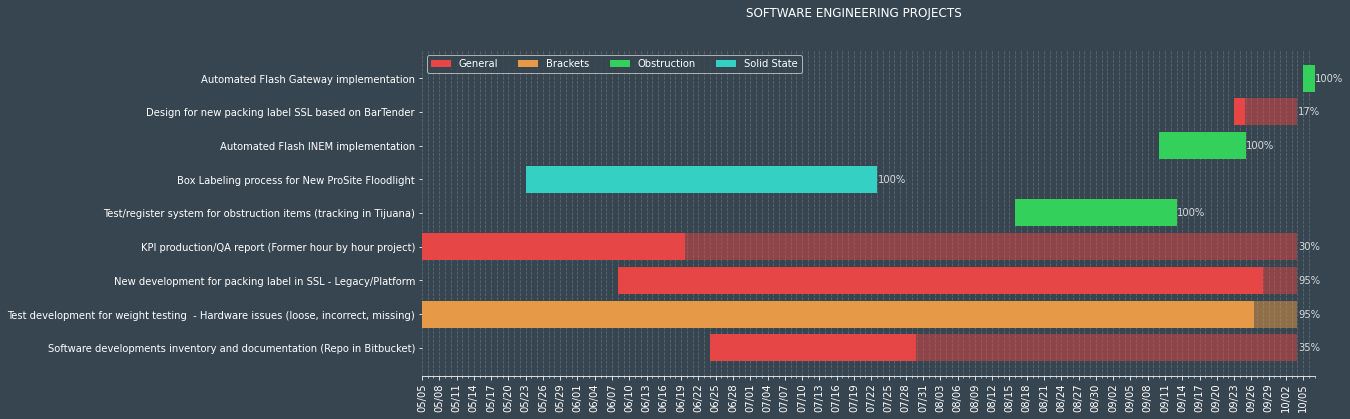

In [7]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(1, figsize=(16,6))

# Set background 
ax.patch.set_facecolor('#36454F')
fig.patch.set_facecolor('#36454F')

# Days between start and current progression of each task
df['current_num'] = (df.days_start_to_end*df.completion)
# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

# Texts 
for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, f"{int(row.completion*100)}%", va='center', alpha=0.8, color='w')

# grid lines
ax.set_axisbelow(True)
ax.xaxis.grid(color='w', linestyle='dashed', alpha=0.2, which='both')

# # Legends 
c_dict = {'General':'#E64646', 'Brackets':'#E69946','Obstruction':'#34D05C','Solid State':'#34D0C3'}
legend_elements = [Patch(facecolor=c_dict[i], label=i) for i in c_dict]

leg = plt.legend(loc= "upper left", handles=legend_elements, ncol = len(c_dict), facecolor='#36454F')
for text in leg.get_texts():
    text.set_color("white")


## Thicks
xticks = np.arange(0, df.end_num.max()+1,3)
xticks_labels = pd.date_range(proj_start,end=df.end.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1,1)

ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3], rotation=90, color='w')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(colors='white', which='both')



plt.setp([ax.get_xticklines()], color='w')
ax.set_xlim(0, df.end_num.max())
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_position(('outward',10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')
#ax.set_xticks([])
#ax.set_yticks([])


plt.suptitle('SOFTWARE ENGINEERING PROJECTS', color='w')


plt.savefig('gantt.png', facecolor='#36454F', bbox_inches='tight')

plt.show()
